# Laboratorio 1

Importamos librerias

In [7]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import date
%matplotlib inline
quandl.ApiConfig.api_key = 'riVhxyiwNtvu-2DbzJsD'

Descargamos el nombre de los tickers para poder conseguir los precios de cada activo facilmente

In [8]:
tw = pd.read_csv("DVY_holdingsMAR17.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw1 = pd.read_csv("DVY_holdingsApr.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw2 = pd.read_csv("DVY_holdingsMay.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw3 = pd.read_csv("DVY_holdingsJun.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw4 = pd.read_csv("DVY_holdingsJul.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw5 = pd.read_csv("DVY_holdingsAgo.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw6 = pd.read_csv("DVY_holdingsSep.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw7 = pd.read_csv("DVY_holdingsOct.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw8 = pd.read_csv("DVY_holdingsNov.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw9 = pd.read_csv("DVY_holdingsDic.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw10 = pd.read_csv("DVY_holdingsEne.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tw11 = pd.read_csv("DVY_holdingsFeb.csv",skiprows=10,usecols=[0,3,5,6]).dropna()
tws = [tw,tw1,tw2,tw3,tw4,tw5,tw6,tw7,tw8,tw9,tw10,tw11]

In [9]:
tw = pd.read_csv("DVY_holdingsMAR17.csv",usecols=[1],nrows=4).dropna()
tw1 = pd.read_csv("DVY_holdingsApr.csv",usecols=[1],nrows=4).dropna()
tw2 = pd.read_csv("DVY_holdingsMay.csv",usecols=[1],nrows=4).dropna()
tw3 = pd.read_csv("DVY_holdingsJun.csv",usecols=[1],nrows=4).dropna()
tw4 = pd.read_csv("DVY_holdingsJul.csv",usecols=[1],nrows=4).dropna()
tw5 = pd.read_csv("DVY_holdingsAgo.csv",usecols=[1],nrows=4).dropna()
tw6 = pd.read_csv("DVY_holdingsSep.csv",usecols=[1],nrows=4).dropna()
tw7 = pd.read_csv("DVY_holdingsOct.csv",usecols=[1],nrows=4).dropna()
tw8 = pd.read_csv("DVY_holdingsNov.csv",usecols=[1],nrows=4).dropna()
tw9 = pd.read_csv("DVY_holdingsDic.csv",usecols=[1],nrows=4).dropna()
tw10 = pd.read_csv("DVY_holdingsEne.csv",usecols=[1],nrows=4).dropna()
tw11 = pd.read_csv("DVY_holdingsFeb.csv",usecols=[1],nrows=4).dropna()
numacc = [tw,tw1,tw2,tw3,tw4,tw5,tw6,tw7,tw8,tw9,tw10,tw11]

In [10]:
def rend(tw,m,y):
    data = quandl.get_table('WIKI/PRICES', ticker = [tw.iloc[:,0].values], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': date(year = y, month = m, day = 1), 'lte': '2018-03-01' }, 
                        paginate=True)
    
    data = data.pivot(index="date",columns="ticker",values="adj_close")
    ret = data.apply(lambda x: np.log(x/x.shift(1)).dropna()).fillna(0)
    
    return data.fillna(0),ret

In [11]:
def peso(tickerstotales,tickerscapturados):
    mt = np.setdiff1d(tickerstotales.iloc[:,0],tickerscapturados.columns)
    newtw = tickerstotales
    for i in range(len(tickerstotales)):
        for j in mt:
            if j == tickerstotales.iloc[i,0]:
                newtw = newtw.drop(i)     
    return newtw.sort_values("Ticker").reset_index(drop=True)

In [12]:
def rebalanceo(tws,año):
    meses = np.arange(3,13)
    if año == 2017:
        xmes = [rend(tws[i],meses[i],año) for i in range(len(meses))]
        xmes1 = [xmes[i][0] for i in range(len(xmes))]
        retmes = [xmes[i][1] for i in range(len(xmes))]
        xpeso = [peso(tws[i],xmes1[i]) for i in range(len(meses))]
    else:
        xmes = [rend(tws[i+8],i,año) for i in range(1,3)]
        xmes1 = [xmes[i][0] for i in range(len(xmes))]
        retmes = [xmes[i][1] for i in range(len(xmes))]
        xpeso = [peso(tws[i+8],xmes1[i]) for i in range(len(xmes))]
    
    return xmes1,xpeso,retmes

In [13]:
def mes(x):
    for i in range(len(x)):
        x[i]['date'] = x[i].index
    
    kxmes = [x[i].groupby(pd.Grouper(key='date', freq='M')) for i in range(len(x))]
    kxmes = [[kxmes[i].get_group(x) for x in kxmes[i].groups] for i in range(len(kxmes))]
    kxmes = [[i[j].drop("date",axis=1) for j in range(len(i))] for i in kxmes]
    
    return kxmes

In [14]:
def navdia(tw,rendtw,numacc):
    f = [[float(j.iloc[i,2].replace(",","")) for i in range(len(j))] for j in tw[1]]
    dot = [[[np.dot(f[k],z.iloc[i,:]) for i in range(len(z))] for z in rendtw[k]] 
           for k in range(len(rendtw))]
    k = [float(numacc[i].iloc[3,0].replace(",","")) for i in range(len(numacc))]
    n=[[[x/k[j] for x in y] for y in dot[j]] for j in range(len(dot))]
    
    return n

In [23]:
navdiario[0][-1][0]/navdiario[0][0][0]-1

NameError: name 'navdiario' is not defined

In [ ]:
navdiario[0][-1][0]

In [24]:
navxrebalanceo = lambda nav: [nav[i][-1][0]/nav[i][0][0]-1 for i in range(len(nav))]

In [25]:
def navmes(tws,numacc):
    f = [[float(j.iloc[i,3].replace(",","")) for i in range(len(j))] for j in tws]
    f = [sum(i) for i in f]
    y = [float(numacc[i].iloc[3,0].replace(",","")) for i in range(len(numacc))]
    n = [f[i]/y[i] for i in range(len(f))]
    
    return n

In [44]:
def media(kxmes):
    mediaxmes = [[np.mean(kxmes[j][i]) for i in range(len(kxmes[j]))] for j in range(len(kxmes))]
    return mediaxmes

In [27]:
def vol(nav):
    nav = [[j for i in nav[x] for j in i] for x in range(len(nav))]
    v = [[np.std(i) for i in j] for j in nav]
    return v

In [28]:
def rendxpeso(mediaxmes,tw):
    x =[[sum(np.multiply(tw[1][j].iloc[:,1],mediaxmes[j][i])) 
          for i in range(len(mediaxmes[j]))] for j in range(len(mediaxmes))]
    return x

In [50]:
def grafica(x,y):
    plt.plot(np.arange(len(valoresperado[0])),valoresperado[0][0:x] + valoresperado[x],label=y)
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Rendimientos")
    plt.xlabel("Tiempo")
    plt.ylabel("E[Rp]")
    
    return

In [30]:
def rendimientos(x):
    rebalanceo = valoresperado[0][0:x] + valoresperado[x]
    
    j = 'Rebalanceo tiempo '+str(x)
    if x == 0:
        return pd.DataFrame({'Sin rebalanceo': valoresperado[0]})
    
    else:
        return pd.DataFrame({'Sin rebalanceo': valoresperado[0], j: rebalanceo})

Acomodamos para que quede la fecha como indice y los precios de los activos en cada columna

In [31]:
tw2017 = rebalanceo(tws,2017)
tw2018 = rebalanceo(tws,2018)

In [32]:
rtw2017 = tw2017[2]
rtw2018 = tw2018[2]

In [33]:
mestw2017 = mes(tw2017[0])
mestw2018 = mes(tw2018[0])

In [34]:
navdiario2017 = navdia(tw2017,mestw2017,numacc)
navdiario2018 = navdia(tw2018,mestw2018,numacc)

In [35]:
navdiario = navdiario2017 + navdiario2018

In [36]:
navme = navmes(tws,numacc)

In [37]:
rendmes2017 = mes(rtw2017)
rendmes2018 = mes(rtw2018)

In [45]:
mediaxmes2017=media(rendmes2017)
mediaxmes2018=media(rendmes2018)

In [39]:
navs = navxrebalanceo(navdiario)

In [40]:
volxmes = vol(navdiario)

In [41]:
nav = [[j for i in navdiario[x] for j in i] for x in range(len(navdiario))]
v = [[np.std(i) for i in j] for j in nav]

In [46]:
r2017 = rendxpeso(mediaxmes2017,tw2017)
r2018 = rendxpeso(mediaxmes2018,tw2018)

In [51]:
valoresperado = r2017 + r2018

,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Dec 2018,Jan 2018,Feb 2018
NO rebalanceo Marzo 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0394824,0.18871,-0.00402921,0.0727071,-0.249056,-0.904968
Rebalanceo Abril 2017,-0.0640015,0.0597777,0.0280138,0.0347515,0.024376,-0.0411714,0.121767,0.0413771,0.186124,-0.00375992,0.0673185,-0.250736,-0.933869
Rebalanceo Mayo 2017,-0.0640015,0.0192303,0.062309,0.0304431,0.0238414,-0.0353716,0.112341,0.0443588,0.182388,-0.0088993,0.0659445,-0.249863,-0.92654
Rebalanceo Junio 2017,-0.0640015,0.0192303,0.0253608,-0.0100193,0.0244033,-0.0376475,0.118466,0.0434014,0.186513,-0.00404275,0.0668814,-0.250114,-0.936493
Rebalanceo Julio 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0182673,-0.0332769,0.117339,0.0446897,0.18343,-0.00405618,0.0683036,-0.248948,-0.925012
Rebalanceo Agosto 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0268032,0.110673,0.0491572,0.180516,-0.0103228,0.0668065,-0.248855,-0.892962
Rebalanceo Septiembre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.115161,0.0488047,0.186159,0.0015433,0.0733826,-0.249722,-0.927707
Rebalanceo Octubre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0481737,0.186061,0.00183345,0.0733931,-0.25002,-0.930067
Rebalanceo Noviembre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0394824,0.211864,0.00771,0.0702581,-0.250927,-0.968714
Rebalanceo Dieciembre 2017,-0.0640015,0.0192303,0.0253608,0.0343841,0.0248256,-0.0427118,0.124374,0.0394824,0.18871,0.0438937,0.0773951,-0.253428,-0.992971


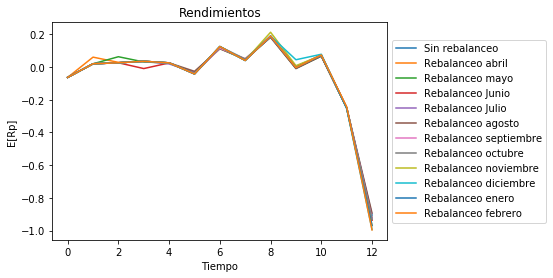

In [52]:
rendrebalan=[rendimientos(i) for i in range (11)]


df = pd.DataFrame({'NO rebalanceo Marzo 2017':rendrebalan[0].iloc[:,0]
                    ,'Rebalanceo Abril 2017':rendrebalan[1].iloc[:,1]
                   ,'Rebalanceo Mayo 2017':rendrebalan[2].iloc[:,1]
                  ,'Rebalanceo Junio 2017':rendrebalan[3].iloc[:,1]
                  ,'Rebalanceo Julio 2017':rendrebalan[4].iloc[:,1]
                  ,'Rebalanceo Agosto 2017':rendrebalan[5].iloc[:,1]
                  ,'Rebalanceo Septiembre 2017':rendrebalan[6].iloc[:,1]
                  ,'Rebalanceo Octubre 2017':rendrebalan[7].iloc[:,1]
                  ,'Rebalanceo Noviembre 2017':rendrebalan[8].iloc[:,1]
                  ,'Rebalanceo Dieciembre 2017':rendrebalan[9].iloc[:,1]
                   
                  ,'Rebalanceo Enero 2017':rendrebalan[10].iloc[:,1]})
index_ = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Dec 2018", "Jan 2018","Feb 2018"] 
#index_ = ('Marzo 2017', 'Abril 2017','Mayo 2017','Junio 2017','Julio 2017','Agosto 2017','Septiembre 2017','Octubre 2017','Noviembre 2017','Diciembre 2017','Enero 2018','Febrero 2018') 
df.index = index_ 

grafica(0,"Sin rebalanceo"),grafica(1,"Rebalanceo abril"),grafica(2,"Rebalanceo mayo"),grafica(3,"Rebalanceo Junio"),grafica(4,"Rebalanceo Julio"),grafica(5,"Rebalanceo agosto"),grafica(6,"Rebalanceo septiembre"),grafica(7,"Rebalanceo octubre"),grafica(8,"Rebalanceo noviembre"),grafica(9,"Rebalanceo diciembre"),grafica(10,"Rebalanceo enero"),grafica(11,"Rebalanceo febrero")

df.transpose().style


# Creamos nuestro portafolio, con nuestros pesos

In [898]:
w = [np.random.random(len(rtw2017[0].drop("date",axis=1).columns)) for i in range(1000)]
sw = [sum(i) for i in w]
w = list(map(lambda x,y: x/y,w,sw))
media = rtw2017[0].mean()
varianza = rtw2017[0].var()
desvest = rtw2017[0].std()
cov = rtw2017[0].cov()

In [899]:
wret = [[sum(media*i),np.sqrt(np.dot(np.transpose(i), np.dot(cov, i))),i] for i in w]
port = pd.DataFrame(wret,columns = ["E[Rp]","Sigma","W"])

Text(0,0.5,'E[Rp]')

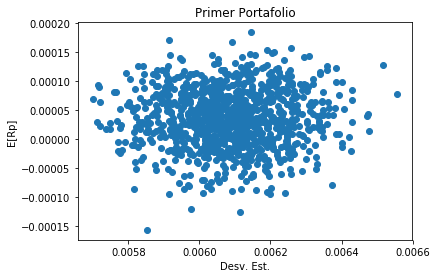

In [900]:
plt.plot(port.iloc[:,1],port.iloc[:,0],"o")
plt.title("Primer Portafolio")
plt.xlabel("Desv. Est.")
plt.ylabel("E[Rp]")

In [901]:
port["Sharpe"] = list(map(lambda x,y: x/y,port.iloc[:,0],port.iloc[:,1]))

In [902]:
min_volatility = port['Sigma'].min()
max_sharpe = port['Sharpe'].max()

sharpe_portfolio = port.loc[port['Sharpe'] == max_sharpe]
min_variance_port = port.loc[port['Sigma'] == min_volatility]

In [903]:
sharpe_portfolio

,E[Rp],Sigma,W,Sharpe
915,0.000184,0.006146,"[0.0032262102612992953, 0.006643197559692923, ...",0.029877


Text(0.5,1,'Efficient Frontier')

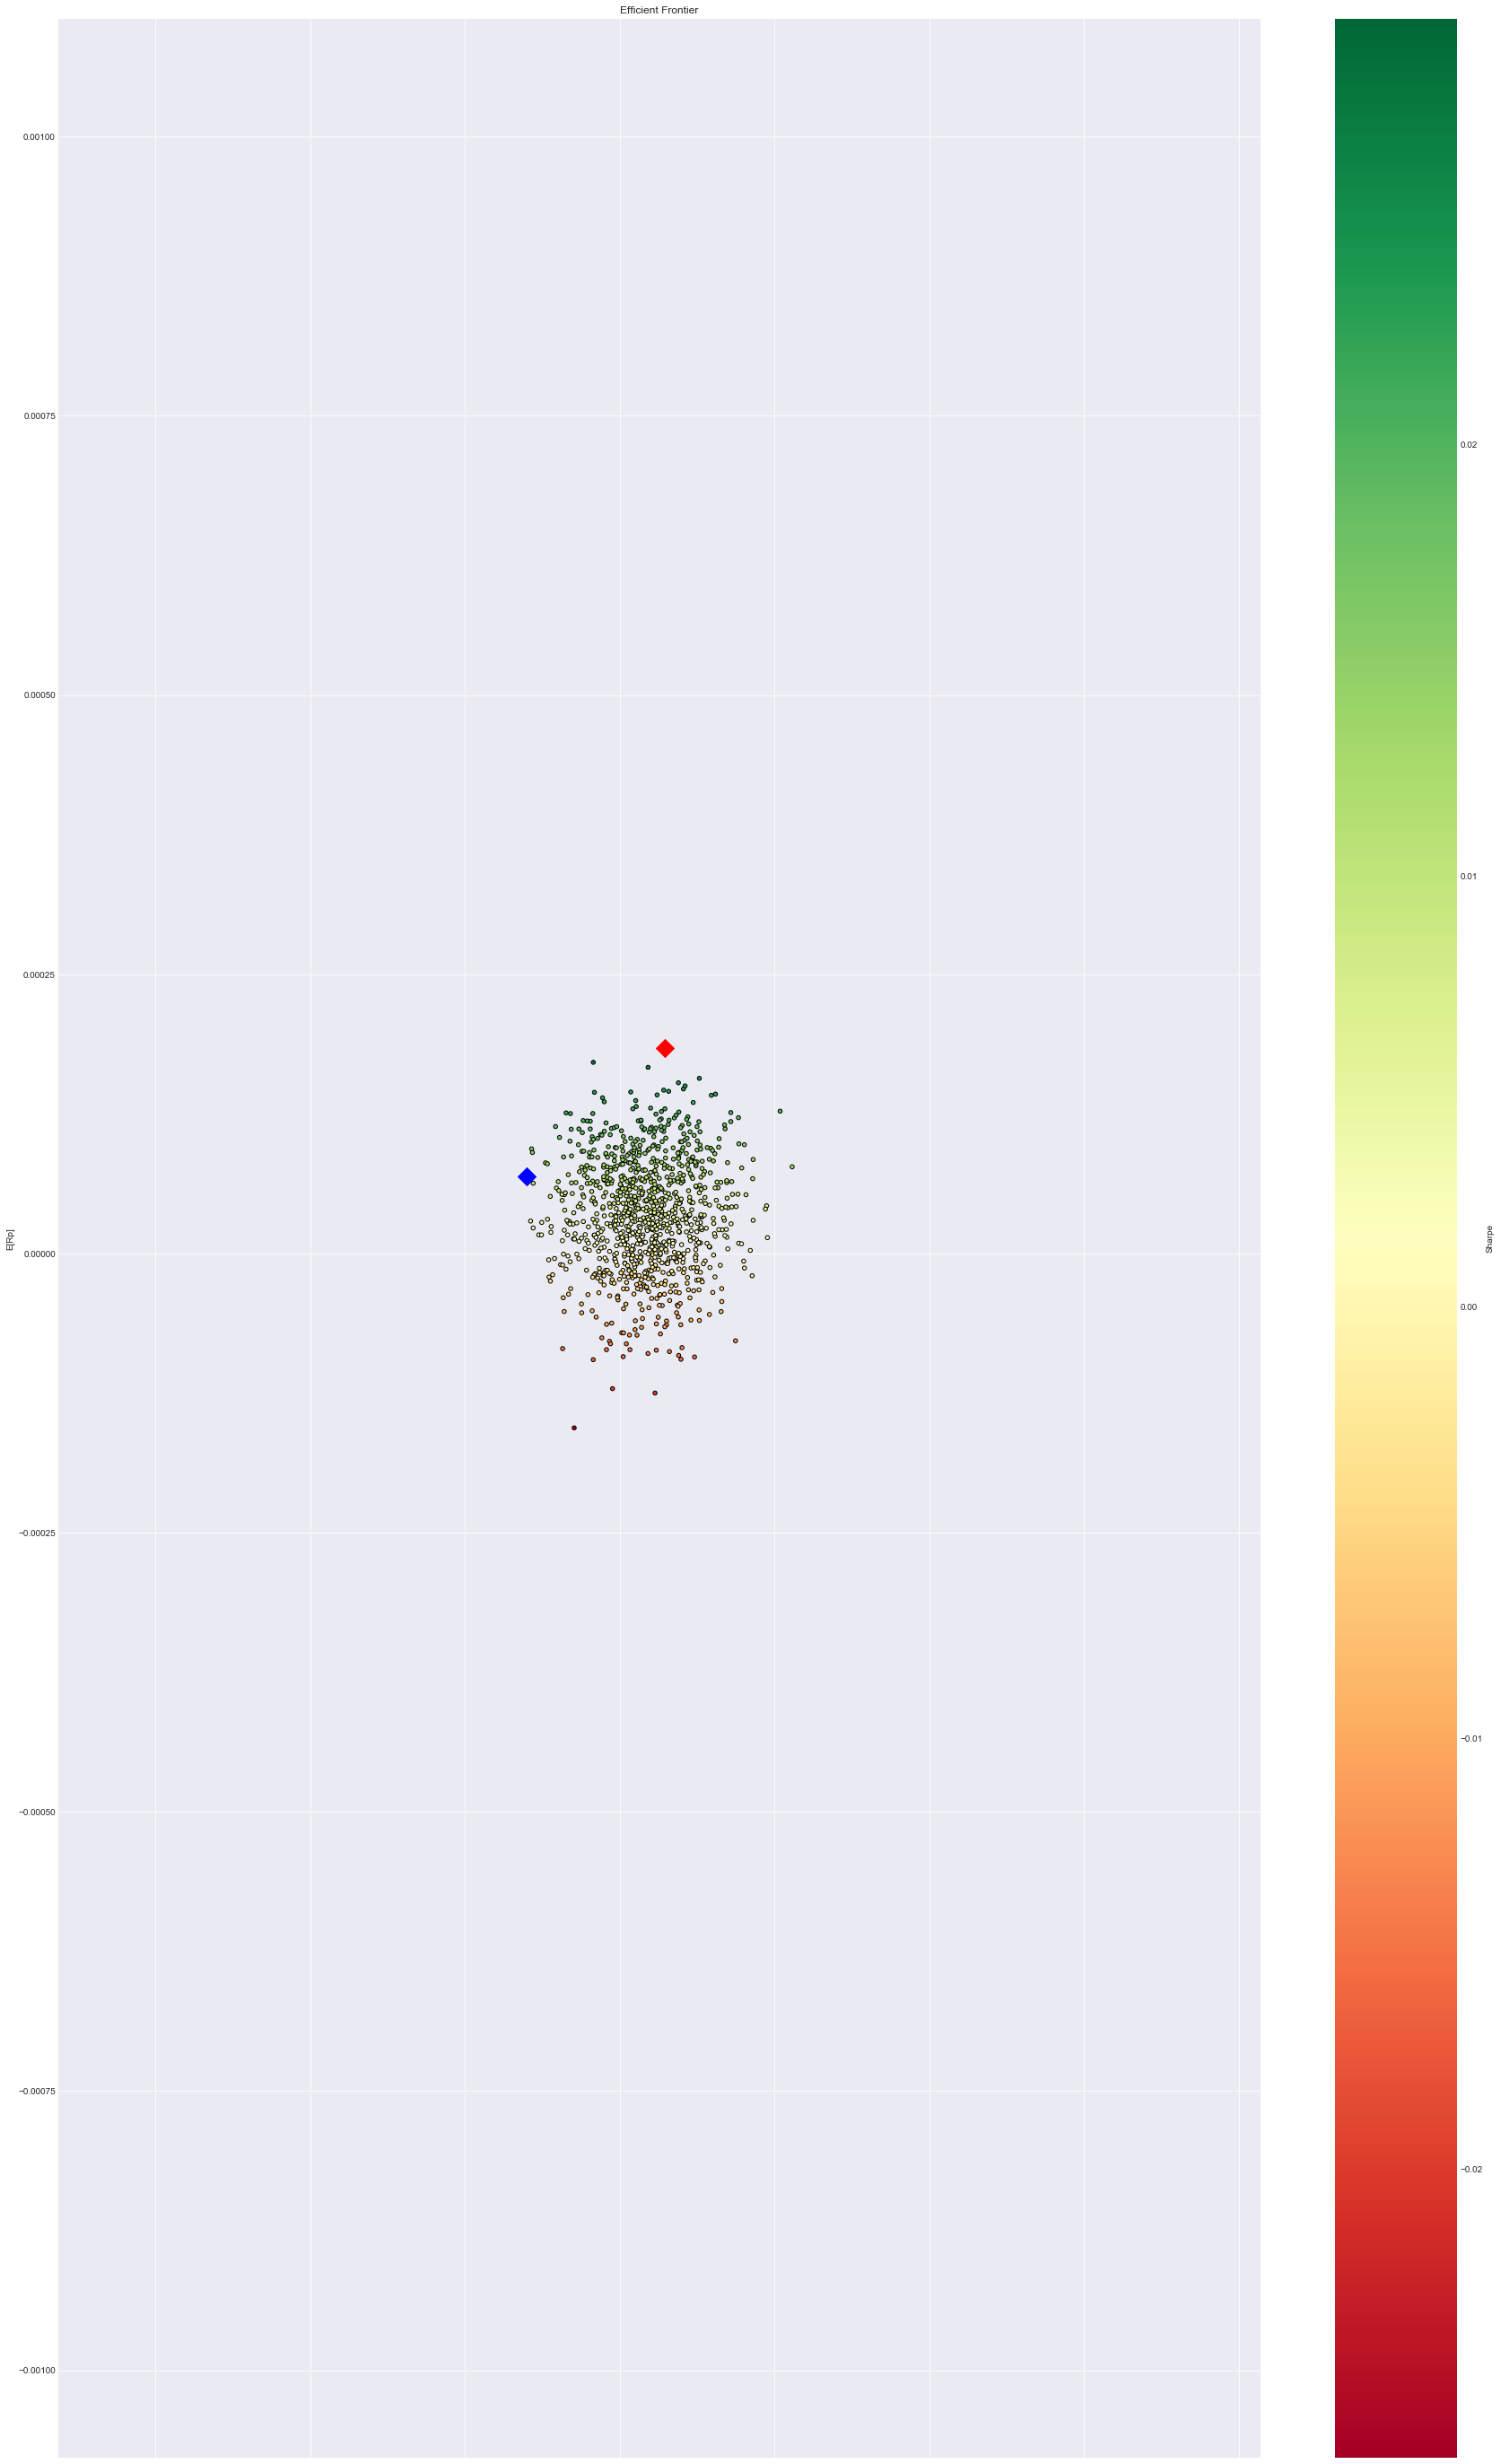

In [904]:
plt.style.use('seaborn-dark')
port.plot.scatter(x='Sigma', y='E[Rp]', c='Sharpe',
                cmap='RdYlGn', edgecolors='black' ,figsize=(30, 50), grid=True)
plt.scatter(x=sharpe_portfolio['Sigma'], y=sharpe_portfolio["E[Rp]"], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Sigma'], y=min_variance_port["E[Rp]"], c='blue', marker='D', s=200 )
plt.xlabel('Desv. Est.')
plt.ylabel('E[Rp]')
plt.title('Efficient Frontier')

In [289]:
menor = sharpe_portfolio
w = menor.iloc[:,2]
w

11    [0.015001724546649334, 0.0007615587331729181, ...
Name: W, dtype: object